# Analytics Continuum: From Description to Prescription

This notebook demonstrates the three types of analytics and how they build on each other:

1. **Descriptive Analytics**: What happened?
2. **Predictive Analytics**: What will happen?
3. **Prescriptive Analytics**: What should we do?

We'll use a retail store scenario where business decisions (staffing, marketing spend) directly impact outcomes (revenue, profit).


## Scenario: Retail Store Operations

Imagine you manage a retail store and must make decisions about:
- **Staff hours**: How many hours to schedule employees
- **Marketing spend**: How much to spend on advertising
- **Inventory**: How much product to stock

These decisions directly impact:
- **Revenue**: Money coming in from sales
- **Profit**: Revenue minus all costs
- **Customer satisfaction**: How happy customers are with service

This is perfect for prescriptive analytics because we can see how **decisions** drive **outcomes**.


## Step 1: Import Libraries

We'll use a few Python libraries to work with data and create visualizations.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Step 2: Create Business Data

We'll create a dataset that shows how business decisions impact outcomes. This simulates 52 weeks of store operations.


In [2]:
# Set random seed for reproducible results
np.random.seed(42)

# Create 52 weeks of data
weeks = pd.date_range('2024-01-01', periods=52, freq='W')


Now we'll create the decision variables (what the manager controls) and calculate the outcomes (what results from those decisions).


In [3]:
# Decision variables (what the manager decides)
store_data = pd.DataFrame({
    'week': weeks,
    'staff_hours': np.random.randint(80, 120, 52),  # Decision: how many hours to schedule
    'marketing_spend': np.random.randint(500, 2000, 52),  # Decision: marketing budget
    'inventory_value': np.random.randint(10000, 20000, 52),  # Decision: how much inventory
})


Now we calculate the outcomes based on the decisions. The relationships are:
- More staff hours → more sales capability → higher revenue (but also higher cost)
- More marketing spend → more customer awareness → higher revenue
- More inventory → ability to meet demand → higher revenue (but holding costs)


In [4]:
# Calculate revenue based on decisions
store_data['revenue'] = (
    1000 +  # Base revenue
    store_data['staff_hours'] * 30 +  # Each staff hour generates $30 in sales
    store_data['marketing_spend'] * 0.8 +  # Marketing drives revenue
    np.random.normal(0, 500, 52)  # Random variation (real-world uncertainty)
)


In [5]:
# Calculate profit (revenue minus all costs)
store_data['profit'] = (
    store_data['revenue'] - 
    store_data['staff_hours'] * 25 -  # Staff cost: $25 per hour
    store_data['marketing_spend'] -  # Marketing cost
    store_data['inventory_value'] * 0.1 -  # Inventory holding cost (10% of value)
    np.random.normal(0, 200, 52)  # Random variation
)


Let's look at the data we created:


In [6]:
store_data.head(10)


,week,staff_hours,marketing_spend,inventory_value,revenue,profit
0,2024-01-07,118,1911,13104,6705.666810,325.494688
1,2024-01-14,108,1525,17215,5314.023665,-737.765968
2,2024-01-21,94,1521,12454,3709.211976,-1679.965329
3,2024-01-28,87,1913,18996,5313.158972,-1182.273571
4,2024-02-04,100,1065,12731,4654.241774,-118.960034
5,2024-02-11,118,1629,18154,5698.631572,-654.595085
6,2024-02-18,98,1202,19762,5128.068163,-212.123547
7,2024-02-25,102,901,15056,4697.769546,-496.975905
8,2024-03-03,90,1229,18110,4790.669415,-759.209948
9,2024-03-10,90,661,13840,3217.642533,-903.928235


## Part 1: Descriptive Analytics - "What Happened?"

Descriptive analytics looks at historical data to understand what occurred. It answers questions like:
- What was our average revenue?
- When did we have the highest profits?
- What was the relationship between staff hours and revenue?

**Key point**: Descriptive analytics tells you about the past, but doesn't predict the future or tell you what to do.


In [7]:
# Basic statistics
store_data[['revenue', 'profit', 'staff_hours', 'marketing_spend']].describe()


,revenue,profit,staff_hours,marketing_spend
count,52.000000,52.000000,52.000000,52.000000
mean,4913.019523,-373.741905,99.730769,1211.250000
std,723.445110,546.606610,11.663779,437.153891
min,3217.642533,-1679.965329,81.000000,514.000000
25%,4440.241045,-720.444480,90.000000,826.500000
50%,4855.005828,-324.575207,100.000000,1210.500000
75%,5247.956702,37.940992,107.250000,1567.000000
max,6705.666810,583.965125,119.000000,1995.000000


### Key Insights from Descriptive Analytics

Looking at the statistics table above, we can see:
- **Average weekly revenue**: $4,913 (ranging from $3,218 to $6,706)
- **Average weekly profit**: -$374 (ranging from -$1,680 to $584) - Note that the average is negative, meaning costs often exceeded revenue
- **Average staff hours**: 100 hours/week (ranging from 81 to 119 hours)
- **Average marketing spend**: $1,211/week (ranging from $514 to $1,995)

These statistics come from our 52 weeks of historical data. The negative average profit suggests that the store was operating at a loss on average during this period, which is an important insight for decision-making. This tells us what happened, but not what will happen or what we should do.


Let's visualize the relationship between staff hours (a decision) and revenue (an outcome):


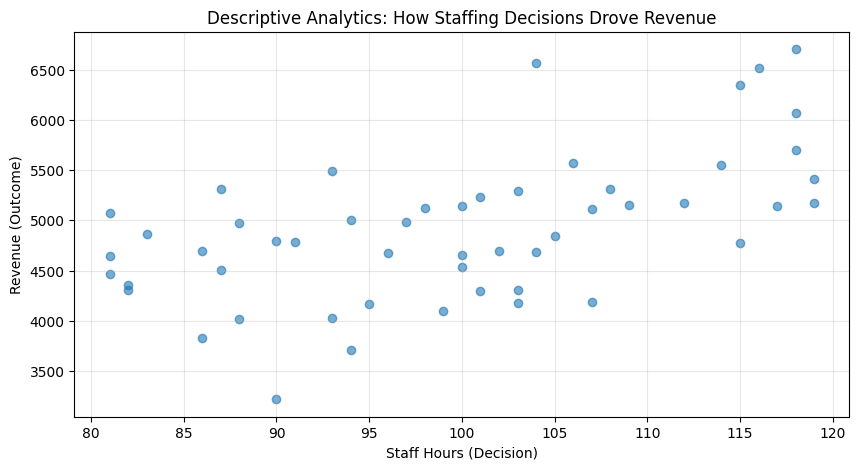

In [8]:
plt.figure(figsize=(10, 5))
plt.scatter(store_data['staff_hours'], store_data['revenue'], alpha=0.6)
plt.xlabel('Staff Hours (Decision)')
plt.ylabel('Revenue (Outcome)')
plt.title('Descriptive Analytics: How Staffing Decisions Drove Revenue')
plt.grid(True, alpha=0.3)
plt.show()


**Observation**: Looking at the scatter plot above, we can see a clear positive relationship between staff hours and revenue. For example:
- When staff hours were around 80-90 hours (left side of the chart), revenue was typically between $3,200-$4,500
- When staff hours increased to 110-120 hours (right side of the chart), revenue increased to approximately $5,000-$6,700

This relationship makes sense because each staff hour generates approximately $30 in revenue (as we defined in our data model: `store_data['staff_hours'] * 30`). The scatter plot shows that as we increased staffing decisions, revenue outcomes increased proportionally. This is descriptive analytics - it describes what happened in the past based on our 52 weeks of historical data.

## Part 2: Predictive Analytics - "What Will Happen?"

Predictive analytics uses historical patterns to forecast future outcomes. It answers questions like:
- If we schedule 110 staff hours next week, what revenue can we expect?
- Based on trends, what will our profit be next quarter?

**Key point**: Predictive analytics forecasts the future, but doesn't tell you which decision to make.


Let's create a simple forecast. We'll use the relationship we observed to predict what revenue would be if we increase staff hours.


In [9]:
# Calculate current averages
current_avg_staff = store_data['staff_hours'].mean()
current_avg_marketing = store_data['marketing_spend'].mean()


### Scenario: What if we increase staff hours by 10%?

Based on the relationship we observed (each staff hour generates approximately $30 in revenue), we can predict the outcome. First, let's see our current averages:


In [10]:
# Show current averages
pd.DataFrame({
    'Metric': ['Average Staff Hours', 'Average Marketing Spend'],
    'Current Value': [f'{current_avg_staff:.0f} hours/week', f'${current_avg_marketing:.0f}/week']
})


,Metric,Current Value
0,Average Staff Hours,100 hours/week
1,Average Marketing Spend,$1211/week


Now let's forecast what happens if we increase staff hours by 10%. We'll use the same relationship we observed in the descriptive analytics: each staff hour generates approximately $30 in revenue.


In [11]:
# Forecast: If we increase staff hours by 10%
forecast_staff = current_avg_staff * 1.1

# Estimate revenue using the same relationship
forecast_revenue = (
    1000 + 
    forecast_staff * 30 +  # Updated to match main data: $30 per hour
    current_avg_marketing * 0.8
)

# Display forecast
pd.DataFrame({
    'Scenario': ['Current', 'If we increase staff hours by 10%'],
    'Staff Hours': [f'{current_avg_staff:.0f}', f'{forecast_staff:.0f}'],
    'Expected Revenue': [f'${store_data["revenue"].mean():,.0f}', f'${forecast_revenue:,.0f}']
})


,Scenario,Staff Hours,Expected Revenue
0,Current,100,"$4,913"
1,If we increase staff hours by 10%,110,"$5,260"


**This is predictive analytics**: Looking at the forecast table above, we can see that increasing staff hours from 100 to 110 hours (a 10% increase) would increase expected revenue from $4,913 to $5,260 (an increase of $347). We're forecasting what will happen if we take a specific action. But we haven't yet decided whether this is the *best* action to take.

## Part 3: Prescriptive Analytics - "What Should We Do?"

Prescriptive analytics goes beyond prediction to recommend specific actions. It considers:
- Your objectives (maximize profit? maximize revenue? balance both?)
- Your constraints (budget limits, minimum staffing requirements)
- Tradeoffs between different options

**Key point**: Prescriptive analytics recommends actions, but humans make the final decision.


### Decision Scenario

**Objective**: Maximize profit (not just revenue)

**Constraint**: Total weekly budget cannot exceed $4,000

**Decision**: How should we allocate between staff hours and marketing spend?

Let's evaluate different options:


In [12]:
# Create different allocation options
options = pd.DataFrame({
    'option': ['A', 'B', 'C', 'D'],
    'staff_hours': [100, 110, 90, 105],
    'marketing_spend': [1500, 1250, 1750, 1375],
})

# Calculate costs and outcomes for each option
options['staff_cost'] = options['staff_hours'] * 25
options['total_cost'] = options['staff_cost'] + options['marketing_spend']
# Revenue: Each staff hour generates $30 in sales (more than the $25 cost)
options['revenue'] = (
    1000 + 
    options['staff_hours'] * 30 +  # Increased from $15 to $30 per hour
    options['marketing_spend'] * 0.8
)
options['profit'] = options['revenue'] - options['total_cost']

# Filter to only feasible options (within budget)
feasible_options = options[options['total_cost'] <= 4000].copy()
feasible_options


,option,staff_hours,marketing_spend,staff_cost,total_cost,revenue,profit
0,A,100,1500,2500,4000,5200.0,1200.0
1,B,110,1250,2750,4000,5300.0,1300.0
2,C,90,1750,2250,4000,5100.0,1100.0
3,D,105,1375,2625,4000,5250.0,1250.0


### Prescriptive Recommendation

Based on our objective (maximize profit) and constraint (budget limit), which option is best?


In [13]:
# Find the option with highest profit
best_option = feasible_options.loc[feasible_options['profit'].idxmax()]

# Display the recommendation
pd.DataFrame({
    'Metric': ['Recommended Option', 'Staff Hours', 'Marketing Spend', 
               'Total Cost', 'Expected Revenue', 'Expected Profit'],
    'Value': [
        f"Option {best_option['option']}",
        f"{best_option['staff_hours']:.0f} hours",
        f"${best_option['marketing_spend']:.0f}",
        f"${best_option['total_cost']:.0f} (within budget)",
        f"${best_option['revenue']:,.0f}",
        f"${best_option['profit']:,.0f}"
    ]
})


,Metric,Value
0,Recommended Option,Option B
1,Staff Hours,110 hours
2,Marketing Spend,$1250
3,Total Cost,$4000 (within budget)
4,Expected Revenue,"$5,300"
5,Expected Profit,"$1,300"


**This is prescriptive analytics**: Looking at the recommendation table above, we can see that **Option B** is recommended because:
- It has the highest profit at **$1,300** (compared to $1,200 for Option A, $1,100 for Option C, and $1,250 for Option D)
- It uses **110 staff hours** and **$1,250 in marketing spend**
- The total cost is **$4,000**, which meets our budget constraint
- It generates **$5,300 in revenue**, resulting in the maximum profit of **$1,300**

We've evaluated multiple options, considered the objective (maximize profit) and constraints (budget limit of $4,000), and recommended a specific action. This demonstrates how prescriptive analytics goes beyond just predicting outcomes to actually recommending the best decision.


**This is prescriptive analytics**: We''ve evaluated multiple options, considered the objective and constraints, and recommended a specific action.

**Important**: This is a *recommendation*, not a command. The human decision-maker must still evaluate:
- Does this make sense given current business conditions?
- Are there factors the model doesn't know about?
- Should we implement this recommendation?


## Summary: How the Three Types Build on Each Other

1. **Descriptive** told us what happened: "More staff hours correlated with higher revenue"
2. **Predictive** forecasted what would happen: "If we increase staff hours by 10%, revenue will increase"
3. **Prescriptive** recommended what to do: "Given your budget constraint and profit objective, choose the option that maximizes profit"

Each type builds on the previous one. You need good descriptive analytics before you can do good predictive analytics. You need good predictive analytics before you can do good prescriptive analytics.


### Visualizing the Continuum

Let's see all three types together:


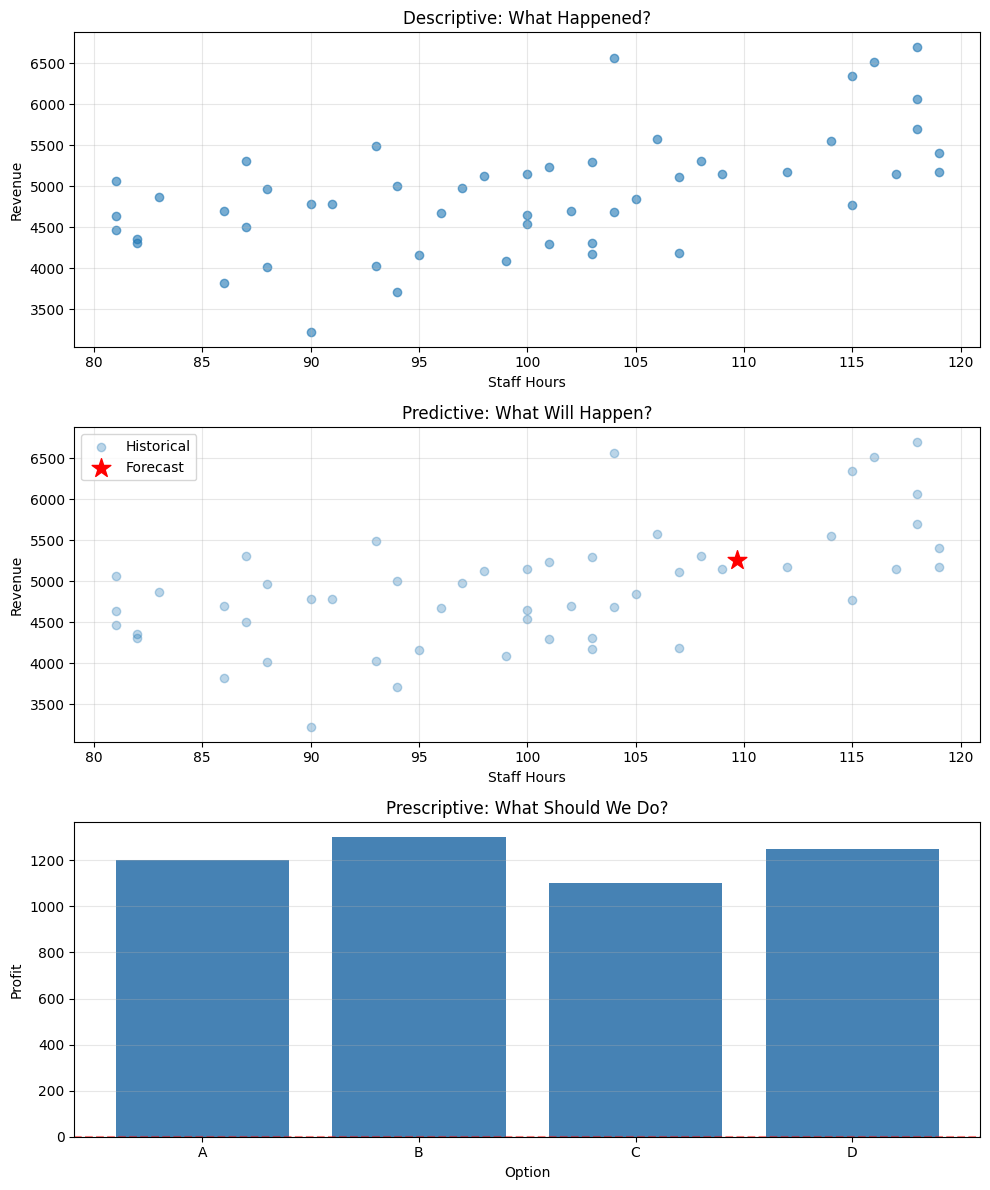

In [14]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# Descriptive: What happened?
axes[0].scatter(store_data['staff_hours'], store_data['revenue'], alpha=0.6)
axes[0].set_xlabel('Staff Hours')
axes[0].set_ylabel('Revenue')
axes[0].set_title('Descriptive: What Happened?')
axes[0].grid(True, alpha=0.3)

# Predictive: What will happen?
axes[1].scatter(store_data['staff_hours'], store_data['revenue'], alpha=0.3, label='Historical')
axes[1].scatter(forecast_staff, forecast_revenue, color='red', s=200, marker='*', 
                label='Forecast', zorder=5)
axes[1].set_xlabel('Staff Hours')
axes[1].set_ylabel('Revenue')
axes[1].set_title('Predictive: What Will Happen?')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Prescriptive: What should we do?
axes[2].bar(feasible_options['option'], feasible_options['profit'], color='steelblue')
axes[2].axhline(y=0, color='r', linestyle='--', alpha=0.5)
axes[2].set_xlabel('Option')
axes[2].set_ylabel('Profit')
axes[2].set_title('Prescriptive: What Should We Do?')
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()
